In [27]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Читаем файл

In [28]:
data = pd.read_csv("data/semeion.txt", sep='\s+', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
X = data.drop(range(256, 266), axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X.tail()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1592,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Приводим Y в более понятный вид, чем то, что предлагает датасет

In [31]:
Y = pd.DataFrame(data.iloc[:, range(256, 266)])
Y.rename(columns=dict(zip(range(256, 266), range(10))), inplace=True)
Y['label'] = Y.apply(lambda x: Y.columns[x.idxmax()], axis=1)
Y = Y['label']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [32]:
Y.tail()

1588    9
1589    9
1590    9
1591    9
1592    9
Name: label, dtype: int64

Для красоты визуализируем пару картинок (500-ую и 1500-ую)

<function matplotlib.pyplot.show(*args, **kw)>

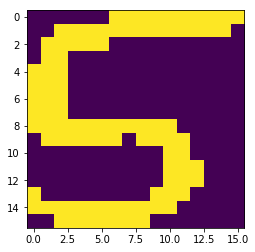

In [41]:
import matplotlib.pyplot as pyplot
image = np.array(X.iloc[[500]].values[0]).reshape(16, 16)
pyplot.imshow(image)
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

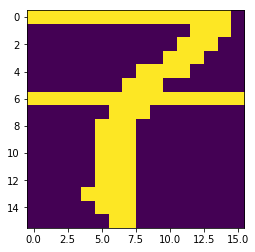

In [42]:
image = np.array(X.iloc[[1500]].values[0]).reshape(16, 16)
pyplot.imshow(image)
pyplot.show

Сгенерируем тренировочную и тестовую выборки:

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

Проганяем через дефолтный классификатор и смотрим результат

In [44]:
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)
predict = knc.predict(X_test)

In [45]:
metrics.accuracy_score(Y_test,predict)

0.89395611285266453

Найдем более удачные параметры

In [46]:
gridSearch = GridSearchCV(knc, {'n_neighbors': list(range(5, 25, 2)),
                       'metric': ['euclidean', 'minkowski'],
                       'weights': ['uniform', 'distance']},
                        scoring='accuracy', cv=4)
gridSearch.fit(X_train, Y_train)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'metric': ['euclidean', 'minkowski'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
gridSearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [48]:
gridSearch.best_score_

0.90545368916797486